In [23]:
import pandas as pd
import torch

In [21]:
#1.Import dataset from online
dataset =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species'])
#2.With Pd.Categorical  I can basicalle transforme the species variable into a dummy
dataset['species'] = pd.Categorical(dataset['species']).codes
#3.Randomize the organization of the dataset, its like shuffeling a deck of cards, seeding it at 1234
dataset = dataset.sample(frac=1, random_state=1234)
#4.Separate the database into testing and training, .values trasforms into into a numpy array, :4 goes from variables 0-3
train_input=dataset.values[:120,:4]
train_target = dataset.values[:120, 4]
#5.The testing dataset is the last 30 observations startin on 119 until the end. All of them numpy arrays
test_input = dataset.values[120:, :4]
test_target = dataset.values[120:, 4]

In [28]:
import torch
#6.We define the seeding and create the number of hidden layers 
torch.manual_seed(1234)
hidden_units=5

#7.Connections  4 inputs , connect to 5 hidden layers, before the output layer it transforms it with the activation function
#7.1.Finally we connect the 5 hidden layers with the 3 outputs ( the number of categorical values species of flowers)
net=torch.nn.Sequential(
    torch.nn.Linear(4, hidden_units),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_units,3))
#8. The resuls will be displayed like this Iris Setosa = [1, 0, 0] , Iris Versicolour = [0, 1, 0] , and Iris Virginica = [0, 0, 1])
#9. We need to choose the optimizer criterior so in can do the backpropagation and update the weights, it might as well be MSE
criterion=torch.nn.CrossEntropyLoss()
#10.The learning rate is w=w+lr*(gradient) is the rate at which we update the weights (remeber all the matrix operations)
#11. The optimizer is the algortihm we use for gradient descendent. Its foof we dont have to create all this from scrath
optimizer=torch.optim.SGD(net.parameters(),lr=0.1,momentum=0.9)
#12.Lets train the dataset.
#13.epochs are the number of times the algortihms sees our whole data set.
epochs=50

for epoch in range(epochs):
#14.We have to define our inputs as outgrad.varibles to be able to alter the weights and transformtehm into a tensor
#15. This is how a single observations looks [6.1000, 3.0000, 4.6000, 1.4000]
    inputs=torch.autograd.Variable(torch.Tensor(train_input).float())
    targets=torch.autograd.Variable(torch.Tensor(train_target).float())
#16.We zero the gradient to prevent an acumulation of gradients after every iteration. The weights are the only one who change    
    optimizer.zero_grad()
    out=net(inputs)
#17.This calculates the loss y_hat-y. For some reason the data can not be float in criterios but long is an integer that can hold large types of numbers
    loss=criterion(out,targets.long())
#18.We back propagate the loss. This computes the gradient of the Loss Function ( The delta for each steo) as stores it in the parameter of the function
    loss.backward()
#19. The optimizer does the update of the weights
    optimizer.step()
#20.We just end up printing results
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))



Epoch 1 Loss: 1.2181
Epoch 10 Loss: 0.6745
Epoch 20 Loss: 0.2447
Epoch 30 Loss: 0.1397
Epoch 40 Loss: 0.1001
Epoch 50 Loss: 0.0855


In [39]:
# Now to 'test' how good our model is:
import numpy as np

inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())
optimizer.zero_grad()
#This is our trained neural network that we just insert the testing data
# This gives us a number for each output. for example for observation 1. [-1.7143e+01,  5.7532e+00,  1.3460e+01]
out = net(inputs)
#_ stores the values and '1' stores the indices of the values on predicted
predicted_values, predicted_indexes = torch.max(out.data, 1)
#Counts how many mistakes it made.
error_count = test_target.size - np.count_nonzero((targets == predicted_indexes).numpy())
#Imprimo cuantos errores
print('Errors: {}; Accuracy: {}'.format(error_count, 100 * torch.sum(targets == predicted) / test_target.size))

Errors: 0; Accuracy: 100.0


# Clasiffy Hand Written Digits with Tensorflow (Keras)

In [115]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as v1

In [116]:
# Loading the data set from MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [117]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


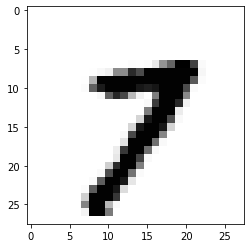

In [118]:
# I can look directly at the numpy array and reorganizeset
img1=X_train[40000].reshape(28,28)
plt.imshow(img1,cmap='Greys')

In [119]:
#To feed it to the network we need to reshape as 784 pixel array (28x28)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [121]:
#This are the lalbels 0,10 . The number 4 will be depicted as 4 is mapped to [0, 0, 0,0, 1, 0, 0, 0, 0, 0]
classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, classes)
Y_test = tf.keras.utils.to_categorical(Y_test, classes)

In [128]:
#We need to define the size of the input layer( number x_t of the image in our case are the 784 pixels)
#Batch Size is the number of training samples. In this case only 100 training samples
#number of epochs how many times we go through the whole training set
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 100


In [129]:
#Defining our model
model = tf.keras.Sequential([
#1. The model has 1 hidden layer,with 100 neuros, 784 inputs (total pixes of of the image)
                            tf.keras.layers.Dense (hidden_neurons, input_dim=input_size),
#2. The out put off the neurons get transformed with sigmoid function   
                            tf.keras.layers.Activation('sigmoid'),
#3. The 100 neurons are used to estimate output classes which is 10 (for every number)    
                            tf.keras.layers.Dense (classes),
#4. Then the value is scaled scaled by a probability that is one of the numbers    
                            tf.keras.layers.Activation('softmax')
                            ])

In [130]:
#Now we define the loos function, and the optimizer(  We use all the defaul values)
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')

In [131]:
# Now we are ready to train:, Very important to notice the sizes of the Y_train and X_train matrixes!!!!
model.fit(X_train, Y_train,  epochs=epochs,batch_size=batch_size)


Epoch 1/100
600/600 [==============================] - 1s 1ms/step - loss: 1.3640 - accuracy: 0.6124
Epoch 2/100
600/600 [==============================] - 1s 1ms/step - loss: 0.5230 - accuracy: 0.8770
Epoch 3/100
600/600 [==============================] - 1s 1ms/step - loss: 0.4111 - accuracy: 0.8969
Epoch 4/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3574 - accuracy: 0.9081
Epoch 5/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3214 - accuracy: 0.9155
Epoch 6/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2987 - accuracy: 0.9202
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2828 - accuracy: 0.9235
Epoch 8/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2740 - accuracy: 0.9247
Epoch 9/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2534 - accuracy: 0.9313
Epoch 10/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2418 - accura

In [133]:
#Testing with the Dataset testing
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 752us/step - loss: 0.1196 - accuracy: 0.9626
Test accuracy: 0.9625999927520752


In [134]:
#Visualizing what the network has learned
weights = model.layers[0].get_weights()

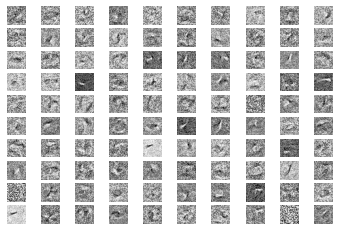

In [136]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy
fig = plt.figure()
w = weights[0].T
for neuron in range(hidden_neurons):
    ax = fig.add_subplot(10, 10, neuron + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)
plt.savefig("neuron_images.png", dpi=300)
plt.show()

In [126]:
Y_train[59999]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)